# Sentiment Analysis on IMDb Movie Reviews Dataset

## Abstract

This notebook explores text classification task of sentiment analysis on the IMDb movie reviews dataset using the bag-of-words and TF-IDF vectorization methods, and a naive Bayes classifier. 

## Table of Contents

>[Sentiment Analysis on IMDb Movie Reviews Dataset](#scrollTo=AsYrvE7GL-Zs)

>>[Abstract](#scrollTo=A_KPEIeVMEt9)

>>[Table of Contents](#scrollTo=HzqFwlWtMJgU)

>>[Sentiment Analysis](#scrollTo=K2Fbs5e_MLAx)

>>>[Feature Extraction](#scrollTo=9SiURGCdPOmr)

>>>[Dimensionality Reduction](#scrollTo=-8iKeuybQ2E6)

>>>[Classification](#scrollTo=ln59hS-LSPGQ)

>>>[Evaluation](#scrollTo=J7xjK6RwSQtG)

>>[Implementation](#scrollTo=5X3uRJ1jzfm7)

>>>[Imports](#scrollTo=6ORKupGTzlMw)

>>>[IMDb Movie Reviews Dataset](#scrollTo=x4ffSBagyc3v)

>>>[Load the Dataset into a DataFrame](#scrollTo=HiMxnM8BzobK)

>>>[Text Preprocessing](#scrollTo=cYlBvMrtT_PB)

>>[Text Vectorization](#scrollTo=9CorM9zGVPQ9)

>>>[Bag-of-Words Model](#scrollTo=Y1ubcWhhVVkq)

>>>[Term Frequency-Inverse Document Frequency](#scrollTo=1XB_qBHMYy6B)

>>[Classification](#scrollTo=rpfwxDcmboHe)

>>>[Naive Bayes Classifier](#scrollTo=eOOrbATHbpb8)



## Sentiment Analysis

Sentiment analysis (or opinion mining) is a natural language processing (NLP) classification task of determining the sentiment - the positive or negative orientation a writer expresses toward some subject in a given text. 

Sentiment analysis allows businesses to identify customer sentiment toward
products, brands or services in online conversations and feedback. Sentiment analysis models focus on polarity (positive, negative, neutral) but also on feelings and emotions (e.g. angry, happy, sad) and even on intentions (e.g. interested, not interested).

Most text classification and document categorization systems can be deconstructed into the following four phases: 
- Features Extraction
- Dimensionality Reduction
- Classification
- Evaluation 

### Feature Extraction

In general, texts and documents are unstructured data sets. However, these unstructured text sequences must be converted into a structured feature space when using mathematical modeling as part of a classifier. First, the data needs to be cleaned to omit unnecessary characters and words. After the data has been cleaned, formal feature extraction methods can be applied. 

The common techniques of feature extractions are:
- Bag-of-Words (BoW)
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Word2Vec  
- Global Vectors for Word Representation (GloVe)

These methods are categorized as either word embedding or weighted word feature extraction techniques.

### Dimensionality Reduction

The dimensionality reduction step is an optional part of the pipeline which could be part of the classification system. For example, using Term Frequency-Inverse Document Frequency (TF-IDF) as a feature extraction method when there are 200k unique words in the training set, leads to a very expensive computational cost. Thus, dimensionality reduction techniques such as PCA, LDA, and NMF can reduce the computation time by projecting the feature space onto another lower-dimensional space.

### Classification

One of the simplest classification algorithms are the Naive Bayes and logistic regression classifiers. However, deep learning approaches have achieved surpassing results in comparison to traditional machine learning algorithms.

### Evaluation

Accuracy calculation is the simplest method of evaluation but does not work for unbalanced data sets. Metrics like $F_β$ are more informative in this case.

## Implementation

### Imports

In [ ]:
# Download and Extract the Dataset
import os
import tarfile

from io import BytesIO
from urllib.request import urlretrieve

# Loading the Dataset
import pandas as pd

In [ ]:
# Preprocessing the Dataset
import re
import nltk
import string

from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download("punkt")
nltk.download("omw-1.4")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Text Vectorization
import tensorflow as tf
from keras.layers import TextVectorization

In [ ]:
# Model Creation
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Models Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

### IMDb Movie Reviews Dataset

The IMDb Movie Reviews dataset is a binary sentiment analysis dataset consisting of 50,000 reviews from the Internet Movie Database (IMDb) labeled as positive or negative. The dataset contains an even number of positive and negative reviews. Only highly polarizing reviews are considered. A negative review has a score ≤ 4 out of 10, and a positive review has a score ≥ 7 out of 10. No more than 30 reviews are included per movie. The dataset contains additional unlabeled data.

The [dataset](http://ai.stanford.edu/~amaas/data/sentiment/) is downloaded as a *`.tar.gz`* file. The file is then extracted into the `data/` directory.

Thus, the structure of the dataset directory is as follows:

```
data/
├── aclImdb/
      ├── test/
      │     ├── pos/
      │     ├── neg/
      ├── train/
            ├── pos/
            └── neg/
```

In [ ]:
# Specify the dataset URL
corpus_url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

working_directory = os.getcwd()
dataset_directory = os.path.join(os.getcwd(), "data")
tarfile_path = os.path.join(working_directory, "aclImdb_v1.tar.gz")

# Download and extract the dataset, if haven't already done so
if "data" not in os.listdir(working_directory):

  print("Downloading the Dataset...")
  urlretrieve(corpus_url, tarfile_path)
  print("Dataset Downloaded.")

  print("Extracting the Dataset...")
  with tarfile.open(tarfile_path) as tar_file:
    tar_file.extractall(dataset_directory)
  print("Dataset Extracted.")

else:
  print("Dataset is ready.")

# Update the dataset directory to "/data/aclImdb"
dataset_directory = os.path.join(dataset_directory, "aclImdb")

Dataset is ready.


### Load the Dataset into a DataFrame

The resulting DataFrame should be of the following structure:

| review | label | split |
| --- | --- | --- |
| --- | --- | --- |

Where:

*   `review` *(str)* is the text of the review.
*   `label` *(int)* 1 for positive reviews, 0 for negative ones.
*   `split` *(str)* whether the review belongs to the `train` or `val` set.

In [ ]:
# Create lists that will contain the reviews and group them in a dictionary
train_pos, train_neg, test_pos, test_neg = [], [], [], []
reviews_dict = {
    "train/pos": train_pos,
    "train/neg": train_neg,
    "test/pos": test_pos,
    "test/neg": test_neg
}

# Iterate over the dataset train/test pos/neg directories
for data_subset in reviews_dict:
  
  # Iterate over each file in the current directory
  for file_name in os.listdir(f"{dataset_directory}/{data_subset}"):

    # Open file and append the text review in its corresponding dictionary list
    with open(f"{dataset_directory}/{data_subset}/{file_name}") as review_file:
      reviews_dict[data_subset].append(review_file.read())

# Group all reviews in a DataFrame
imdb_df = pd.concat(
    [pd.DataFrame({"split": "train", "sentiment": 1, "raw_review": train_pos}),
    pd.DataFrame({"split": "train", "sentiment": 0, "raw_review": train_neg}),
    pd.DataFrame({"split": "test", "sentiment": 1, "raw_review": test_pos}),
    pd.DataFrame({"split": "test", "sentiment": 0, "raw_review": test_neg})],
    axis=0, ignore_index=True
)

In [ ]:
imdb_df

,split,sentiment,raw_review
0,train,1,"It's nothing brilliant, groundbreaking or inno..."
1,train,1,First a quick 'shut up!' to those saying this ...
2,train,1,This is another fantasy favorite from Ralph Ba...
3,train,1,I read Schneebaum's book (same title as this f...
4,train,1,Peaceful rancher Robert Sterling is on the los...
...,...,...,...
49995,test,0,"If you take the films, Mad Max, Beyond Thunder..."
49996,test,0,People don't seem to agree with me that movies...
49997,test,0,This movie is one of the worst I've ever seen....
49998,test,0,Mild spoiler in the second paragraph.<br /><br...


### Text Preprocessing

Proper text cleaning and normalization is crucial for an informative featurization. The following step are applied to the raw corpus to clean and normalize it:

*   **Lowercase** the entire corpus.
*   Remove any **HTML tags** (these are a side effect of scraping the reviews off of the web).
*   Remove any **numeric values**.
*   Replace **verb contractions** with their complete form.
*   Remove **punctuations**.
*   Remove **stopwords**.
*   **Stem** the corpus.

In [ ]:
stop_words = set(stopwords.words("english"))
stop_words.difference_update({"no", "not", "nor"})
stop_words = stop_words.union({"'d", "'s"})
stemmer = PorterStemmer()

def preprocess(text):

  # Lowercase the review
  text = text.lower()

  # Remove html tags
  text = re.sub("<[^>]*>", " ", text)

  # Remove numbers
  text = re.sub("[0-9]+", " ", text)
  
  # Replace verbs contractions with their complete form
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"can't", "can not", text)
  text = re.sub(r"n't", " not", text)
  text = re.sub(r"'ve", " have", text)
  text = re.sub(r"'ll", " will", text)
  text = re.sub(r"'re", " are", text)
  text = re.sub(r"'m", " am", text)

  # Tokenize the text into a list
  words_list = word_tokenize(text)

  # Remove stop words
  filtered_tokens = [w for w in words_list if w not in stop_words]

  # Stem tokens
  stemmed_tokens = [stemmer.stem(w) for w in filtered_tokens]
  text = " ".join(stemmed_tokens)

  # Remove punctuation
  text = text.translate(str.maketrans("", "", string.punctuation))

  # Remove redundant whitespace
  text = re.sub("[ ]+", " ", text)

  return text

In [ ]:
imdb_df["raw_review"][2]

"This is another fantasy favorite from Ralph Bakshi; after watching it on YouTube that is. Set in the distant past after the Ice Age, it is a prehistoric sword-and-sorcery quest between good and evil. Nekron, Lord of the realm of Ice and his mother Queen Juliana, has set their sights on conquest of the known world. When their glaciers destroy's the village of a man named Larn, he (Larn) vows to avenge his people and kill the Ice Lord. Meanwhile, the sub-human minions of Nekron and Juliana capture Firekeep's King Jarol's sultry daughter Princess Teegra; but she manages to escape, and eventually meets with Larn, who promises to escort her back to Firekeep; if the sub-humans don't find them first.<br /><br />This movie did very little box office (as did most of Ralph Bakshi's films), but has become a cult classic, partly for the quality of the art, a collaboration between Ralph Bakshi and the famed fantasy artist Frank Frazetta. Also, I have heard that the screenplay was written by Gerry 

In [ ]:
preprocess(imdb_df["raw_review"][2])

'anoth fantasi favorit ralph bakshi watch youtub set distant past ice age prehistor swordandsorceri quest good evil nekron lord realm ice mother queen juliana set sight conquest known world glacier destroy villag man name larn larn vow aveng peopl kill ice lord meanwhil subhuman minion nekron juliana captur firekeep king jarol sultri daughter princess teegra manag escap eventu meet larn promis escort back firekeep subhuman not find first movi littl box offic ralph bakshi film becom cult classic partli qualiti art collabor ralph bakshi fame fantasi artist frank frazetta also heard screenplay written gerri conway roy thoma two men done conan comic book stori background painter includ jame gurney illustr dinotopia novel though admittedli never read conan dinotopia also painter thoma kinkad note artwork figurin musicbox bradford exchang compani besid paint like bakshi film lord ring american pop movi rotoscop process work better film former overal think one best anim fantasi movi ever made

In [ ]:
imdb_df["preprocessed_review"] = imdb_df["raw_review"].apply(preprocess)
imdb_df

,split,sentiment,raw_review,preprocessed_review
0,train,1,"It's nothing brilliant, groundbreaking or inno...",noth brilliant groundbreak innov dog day reaso...
1,train,1,First a quick 'shut up!' to those saying this ...,first quick shut say movi stink not go everi m...
2,train,1,This is another fantasy favorite from Ralph Ba...,anoth fantasi favorit ralph bakshi watch youtu...
3,train,1,I read Schneebaum's book (same title as this f...,read schneebaum book titl film first publish d...
4,train,1,Peaceful rancher Robert Sterling is on the los...,peac rancher robert sterl lose side rang war r...
...,...,...,...,...
49995,test,0,"If you take the films, Mad Max, Beyond Thunder...",take film mad max beyond thunderdom movi steel...
49996,test,0,People don't seem to agree with me that movies...,peopl not seem agre movi bad good time type pe...
49997,test,0,This movie is one of the worst I've ever seen....,movi one worst ever seen even hangov not help ...
49998,test,0,Mild spoiler in the second paragraph.<br /><br...,mild spoiler second paragraph anna christi gar...


## Text Vectorization

In [ ]:
VOCABULARY_SIZE = 20000

In [ ]:
# Get the training and validation sets
x_train_reviews = imdb_df[imdb_df["split"] == "train"]["preprocessed_review"]
x_test_reviews = imdb_df[imdb_df["split"] == "test"]["preprocessed_review"]

y_train = imdb_df[imdb_df["split"] == "train"]["sentiment"]
y_test = imdb_df[imdb_df["split"] == "test"]["sentiment"]

### Bag-of-Words Model

The bag-of-words (BoW) model is a sparse representation that maps arbitrary text into fixed-length (equal to that of the corpus vocabulary) vectors by counting the number of occurrences of the words (unigram) in the given text.  On the other hand, it is very common to also use bigrams and trigrams. In this way, the text feature extracted could detect more information in comparison to unigram.

**Limitations of the BoW Model**

- Dimensionality Problem

  For a vocabulary of size $|V|$, the bag-of-words model encodes every document as a $|V|$-dimensional sparse vector. As vocabulary sizes may potentially run into millions, bag-of-word models face scalability challenges.

- Semantic Problem

  The main issue with the Bag-of-Words model is that it considers all words as equally important, in the case of a binary bag-of-words. While in the term-frequency bag-of-words, many words that occur frequently aren't very informative (e.g. stop words). Even if stop words are removed, there can still be highly frequent and uninformative words. For example, in the IMDb movie reviews corpus, most reviews/documents will contain the words "movie", "film", etc. 

In [ ]:
bow_vectorization_layer = TextVectorization(
    max_tokens=VOCABULARY_SIZE,
    standardize=None,
    ngrams=2,
    output_mode="count",
)

bow_vectorization_layer.adapt(imdb_df["preprocessed_review"])

# Get BoW Vocabulary and its size
bow_vocabulary = bow_vectorization_layer.get_vocabulary()
bow_vocabulary_size = bow_vectorization_layer.vocabulary_size()

In [ ]:
bow_vocabulary[:20]

['[UNK]',
 'not',
 'movi',
 'film',
 'one',
 'like',
 'time',
 'good',
 'make',
 'charact',
 'see',
 'get',
 'watch',
 'would',
 'even',
 'stori',
 'no',
 'realli',
 'scene',
 'well']

In [ ]:
bow_vocabulary[-20:]

['creat movi',
 'contain one',
 'consumpt',
 'congress',
 'complet opposit',
 'commonplac',
 'come good',
 'combo',
 'cobbl',
 'cheapli made',
 'charm not',
 'characterdriven',
 'charact wonder',
 'charact want',
 'charact use',
 'charact though',
 'charact seen',
 'charact far',
 'charact care',
 'chang much']

In [ ]:
x_train = bow_vectorization_layer(x_train_reviews)
x_test = bow_vectorization_layer(x_test_reviews)

### Term Frequency-Inverse Document Frequency

TF-IDF provides an improved weighing over the bag-of-words model, by taking into consideration how unique a word is to the given document. In bag-of-words, vectorization was just concerned with the frequency of vocabulary words in a given document. As a result, articles, prepositions, and conjunctions which don’t contribute a lot to the meaning get as much importance as adjectives. 

TF-IDF overcomes this issue. Words that get repeated too often don’t overpower less frequent but important words. It does so by computing the product of the following two quantities:

*    Term Frequency, which is just the frequency of the word in the text.
$tf_{t, d}=log_{10}(1+count(t, d))$

*    Inverse Document Frequency, which gives higher weight to words that occur only in few documents.
$idf_t=log_{10}(\frac{N}{df_t})$
where $N$ is the total number of documents, and $df_t$ is the number of documents the word occurs in. 

**Limitations of TF-IDF**

While TF-IDF provides an improved word weighting. It still suffers from the same issues as the BoW model.

In [ ]:
tfidf_vectorization_layer = TextVectorization(
    max_tokens=VOCABULARY_SIZE,
    standardize=None,
    ngrams=2,
    output_mode="tf_idf",
)

tfidf_vectorization_layer.adapt(imdb_df["preprocessed_review"])

# Get TF-IDF Vocabulary and its size
tfidf_vocabulary = tfidf_vectorization_layer.get_vocabulary()
tfidf_vocabulary_size = tfidf_vectorization_layer.vocabulary_size()

In [ ]:
x_train = tfidf_vectorization_layer(x_train_reviews)
x_test = tfidf_vectorization_layer(x_test_reviews)

## Classification

In [ ]:
def evaluate_model(y_true, y_pred):

  # Classification Report
  print("Classification Report:-")
  print(classification_report(y_true, y_pred))
  
  # Confusion Matrix
  print("Confusion Matrix:-")
  cm = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
  disp.plot()
  plt.show()

### Naive Bayes Classifier

The Naïve Bayes classifier method is theoretically based on Bayes theorem. 

Let $n$ be the number of documents $\{d_1, ..., d_n\}$ to be classified into one of $k$ classes $\{c_1, ..., c_k\}$.

- Bayes's theorem can be expressed as 
  $P(c|d) = \frac{P(d|c)P(c)}{P(d)}$.

- Thus, a prediction class $\hat c$ is computed as $\hat c=argmax_cP(d|c)P(c)=argmax_cP(w_1, ..., w_T|c)P(c)$.

- The Naive assumption of $i.i.d.$ data points enable the expression of the joint probability as a product: $\hat c=argmax_c\Pi_{i=0}^{T}P(w_i|c)P(c)$.

- This is equivalent to: $\hat c=argmax_c\Sigma_{i=0}^{T}log P(w_i|c)+log P(c)$.

In [ ]:
def fit_nb_model(x_train, x_val, y_train, y_val):
  
  # Instanciate the model
  model = MultinomialNB()

  # Training
  model.fit(x_train, y_train)

  # Evaluation
  print("Model Results on the training set...")
  evaluate_model(y_train, model.predict(x_train))

  print("\nModel Results on the validation set...")
  evaluate_model(y_val, model.predict(x_val))

Bag-of-Words Results:
----------------------------------------
Model Results on the training set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     12500
           1       0.89      0.88      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

Confusion Matrix:-


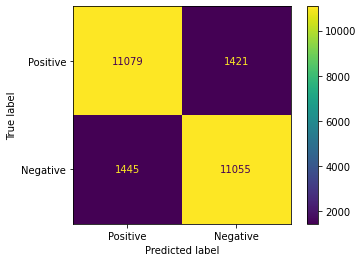


Model Results on the validation set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     12500
           1       0.86      0.82      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

Confusion Matrix:-


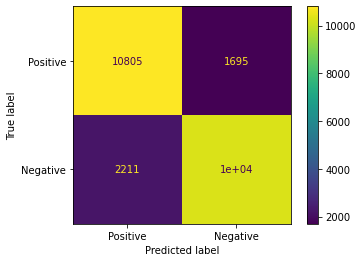

In [ ]:
print("Bag-of-Words Results:")
print("----------------------------------------")
fit_nb_model(x_train, x_test, y_train, y_test)


TF-IDF Results:
----------------------------------------
Model Results on the training set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     12500
           1       0.90      0.89      0.90     12500

    accuracy                           0.90     25000
   macro avg       0.90      0.90      0.90     25000
weighted avg       0.90      0.90      0.90     25000

Confusion Matrix:-


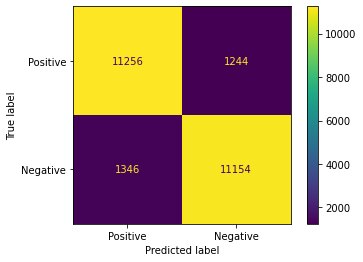


Model Results on the validation set...
Classification Report:-
              precision    recall  f1-score   support

           0       0.81      0.87      0.84     12500
           1       0.86      0.80      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.84      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000

Confusion Matrix:-


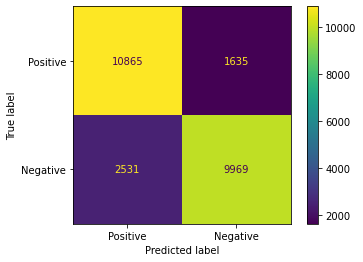

In [ ]:
print("\nTF-IDF Results:")
print("----------------------------------------")
fit_nb_model(x_train, x_test, y_train, y_test)